# Visualization of Recalls
## 11/16/20
## 1/7/20 - adding normalization function
## 1/21 - actually look at the recalls that are the outliers
## 2/4/21 - new visualization techniques

In [6]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.plotly as py
import plotly
import os
import glob
import math
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import copy
from random import randrange
from sklearn.metrics import jaccard_score
import random

from sklearn.decomposition import PCA #for cluster analysis
from gensim.models import KeyedVectors #for word embeddings
import matplotlib.pyplot as plt #for plotting
import os #for importing
import pickle #for loading transcripts
from scipy.stats import pearsonr 

# from _DRAFT_20200604_functions import * #includes constants and score function
from tqdm import tqdm_notebook #for progress bar

%autosave 5

Autosaving every 5 seconds


# 0. Pre
## 1. Importing story and template vectors and sums 

In [7]:
templates = pickle.load( open( 'c_template', "rb" ) )
recalls = pickle.load( open( 'c_recall', "rb" ) )
stories = pickle.load( open( 'c_stories', "rb" ) )
keys_ids = pickle.load( open( 'ids_recall', "rb" ) )
# sums
sums = pickle.load( open( "new_sums", "rb" ) )

## 2. Function for normalizing vectors

In [8]:
def norm_300(matrix):
    n, m = matrix.shape
    for i in range(0,n):
        sum_ = 0
        for j in range(0, 300):
            sum_ = matrix[i][j] * matrix[i][j]
        k = math.sqrt(sum_)
        for j in range(0,300):
            matrix[i][j] = matrix[i][j]/k
    return matrix
    

In [9]:
z = norm_300(all_wv)

NameError: name 'all_wv' is not defined

In [10]:
n, m = z.shape
for i in range(0,n):
    sum_ = 0
    for j in range(0, 300):
        sum_ = z[i][j] * z[i][j]
    print(sum_)

NameError: name 'z' is not defined

# I. Plot all participants for each story- comparison to templates
## A. Concatenatate template vectors

In [11]:
# Concatenating wvs for plotting below
wv_dim = 300
wvs_matrix = np.zeros((8, wv_dim))
order_keys = np.zeros((8,1))
count = 0
for key in templates:
    wvs_matrix[count, :] = templates[key]
    order_keys[count] = key
    count += 1

## B. Concatenate all recalls

In [12]:
concat_stories = {}

first = 0

keys = [11, 12, 13, 14, 21, 22, 23, 24, 31, 32, 33, 34, 41, 42, 43, 44]
ranges = [8]

for key in keys:
    for i in range(0, 3):
        if first == 0:
            cc_stories = recalls[key][i]
            first = 1
        else:
            cc_stories = np.concatenate((cc_stories, recalls[key][i]), axis =0)
    ranges.append((ranges[-1] + sums[key][0]))

## C. Concatenate templates and recalls

In [13]:
all_wv = np.concatenate((wvs_matrix, cc_stories), axis = 0)

## D. Plot 

#F49CBB
#F671A0
#EB3223
#8E251C
#FFFC97
#D0CC38
#FFCB85
#F19923
#B6F7FE
#5896CD
#1C3AF8
#9E1CF8
#B1F0B0
#48FA45
#129210
#000000
light pink is restaurant break up
dark pink is airport break up
red is grocery store break up
maroon is lecture hall break up
light yellow is restaurant proposal
dark yellow is airport proposal
light orange is grocery store proposal
dark orange is lecture hall proposal
light blue is restaurant business deal
medium blue is airport business deal
dark blue is grocery store business deal
dark purple is lecture hall business deal
light green is restaurant meet-cute
bright green is airport meet-cute
forest green is grocery store meet-cute
black is lecture hall meet-cute


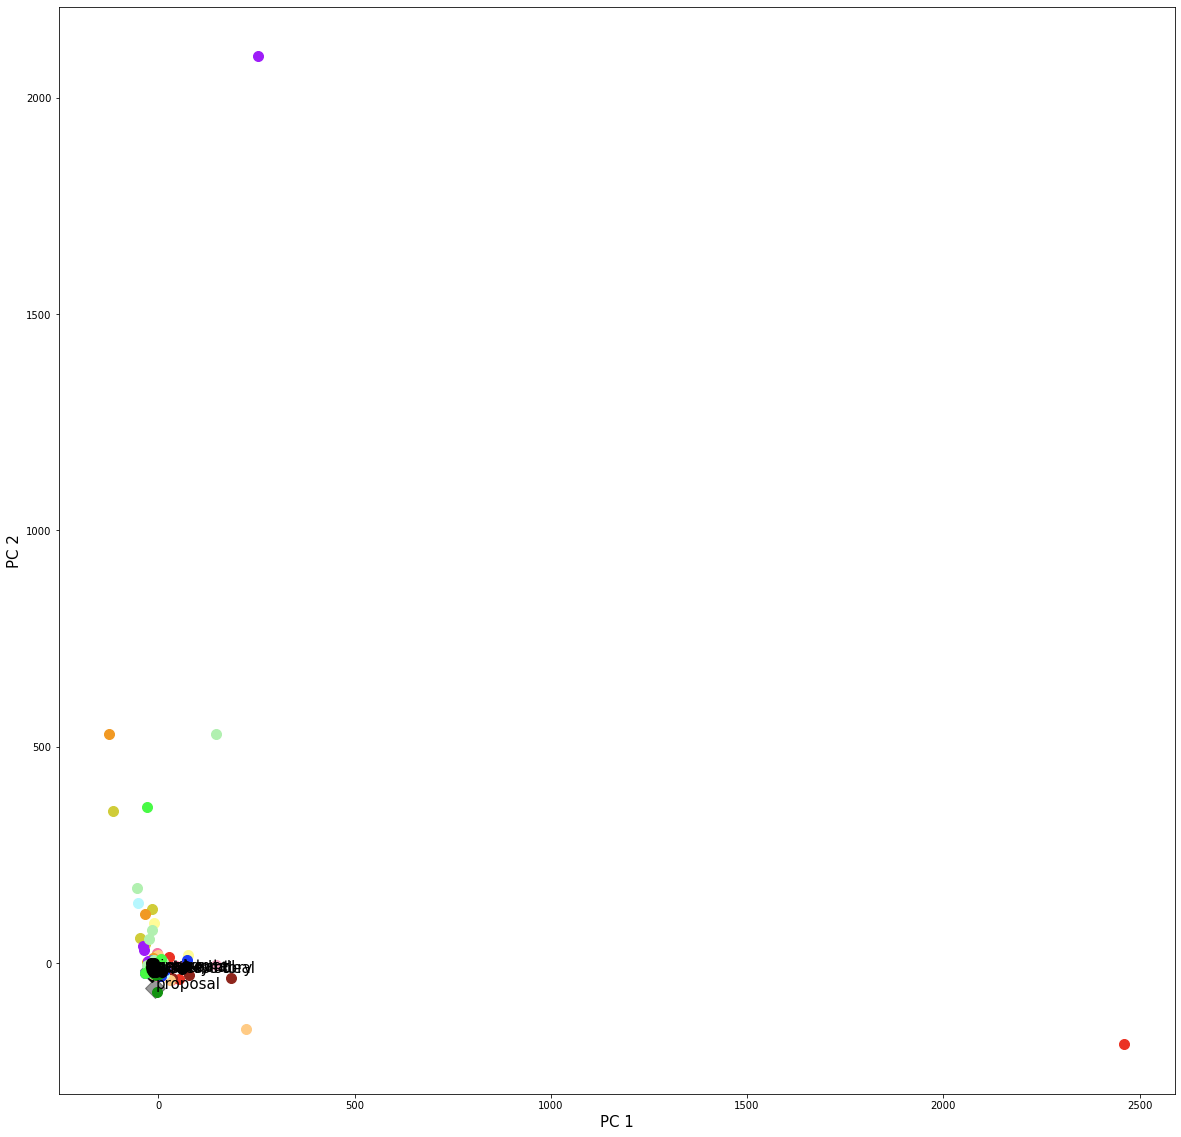

In [14]:
## plot
plt.figure(figsize=(20,20))

#normalize all_wv
all_wv = norm_300(all_wv)
## PCA for first 2 PCs
pca = PCA(n_components=2)
pca.fit(all_wv)
pc12 = pca.transform(all_wv)

###### Plot the templates

# Order keys list
order_keys_list = ['restaurant', 'breakup', 'airport', 'proposal', 'grocery story', 'business deal', 'lecture hall', 'meet-cute']

plt.scatter(pc12[0:8,0], pc12[0:8,1],c= 'k', marker = 'D', s = 200, alpha = .4)

for i in range(8):
    plt.text(pc12[i, 0] + .0035, pc12[i, 1], s= order_keys_list[i], fontsize=15 )
    
plt.xlabel("PC 1", fontsize=15); plt.ylabel("PC 2",fontsize=15);

#### Plot the story word vectors
keys = [11, 12, 13, 14, 21, 22, 23, 24, 31, 32, 33, 34, 41, 42, 43, 44]
colors = ['#F49CBB', '#F671A0',  '#EB3223', '#8E251C', '#FFFC97', '#D0CC38', '#FFCB85', '#F19923', '#B6F7FE', '#5896CD', '#1C3AF8', '#9E1CF8', '#B1F0B0', '#48FA45', '#129210', '#000000']
count = 0

#story 11
for i in range(0, 16):
    plt.scatter(pc12[ranges[i]:ranges[i+1],0], pc12[ranges[i]:ranges[i+1],1],c= colors[i], marker = 'o', s = 100, alpha = 1)
    print(colors[i])
#how do I plot??
#plt.legend(colors, keys)

print('light pink is restaurant break up')
print('dark pink is airport break up')
print('red is grocery store break up')
print('maroon is lecture hall break up')
print('light yellow is restaurant proposal')
print('dark yellow is airport proposal')
print('light orange is grocery store proposal')
print('dark orange is lecture hall proposal')
print('light blue is restaurant business deal')
print('medium blue is airport business deal')
print('dark blue is grocery store business deal')
print('dark purple is lecture hall business deal')
print('light green is restaurant meet-cute')
print('bright green is airport meet-cute')
print('forest green is grocery store meet-cute')
print('black is lecture hall meet-cute')

## E. Remove Outliers

In [15]:
j = int(all_wv.shape[0])
j = j - 8
print(j)
# Index outliers in PC1 dimension
out_pc1 = [idx for idx, val in enumerate(pc12[:, 0]) if val > 600] 
# Index outliers in PC2 dimenstion
out_pc2 = [idx for idx, val in enumerate(pc12[:, 1]) if val > 1000] 
# Concatenate indices
out_pc1.append(out_pc2[0])
print(out_pc1)
# remove outliers from original matrix
new_wv = np.delete(all_wv, out_pc1, axis=0)
print(new_wv.shape)

315
[69, 239]
(321, 300)


## F. Subtract 8 from the indices, so that you can index the keys_ids matrix

In [16]:
print(out_pc1)
a = [x - 8 for x in out_pc1]
print(a)

[69, 239]
[61, 231]


## E. Get the keys and ids of the outliers and export

In [17]:
a

[61, 231]

In [18]:
mp = np.zeros((0,2))

for i in range(0, len(a)):
    this_id = keys_ids[a[i]]
    print(this_id)
    this_id = this_id.reshape(-1, 1)
    mp = np.vstack((mp, this_id.T))
    
pickle.dump( mp, open( 'outlier_ids', "wb" ) )

['/Users/alexreblando/Documents/GitHub/data_analysis_ebs/online_experiment/data/finalver_b8/10/1_1_online_exp_2020-11-20_12h31.55.742'
 '5faa598de2b35a341189d27c']
['/Users/alexreblando/Documents/GitHub/data_analysis_ebs/online_experiment/data/finalver_b2/30/235_1_online_exp_2020-06-24_09h43.44.479'
 '58d9a79c33fef3000118abdf']


## F. Redo Plot

#F49CBB
#F671A0
#EB3223
#8E251C
#FFFC97
#D0CC38
#FFCB85
#F19923
#B6F7FE
#5896CD
#1C3AF8
#9E1CF8
#B1F0B0
#48FA45
#129210
#000000
light pink is restaurant break up
dark pink is airport break up
red is grocery store break up
maroon is lecture hall break up
light yellow is restaurant proposal
dark yellow is airport proposal
light orange is grocery store proposal
dark orange is lecture hall proposal
light blue is restaurant business deal
medium blue is airport business deal
dark blue is grocery store business deal
dark purple is lecture hall business deal
light green is restaurant meet-cute
bright green is airport meet-cute
forest green is grocery store meet-cute
black is lecture hall meet-cute


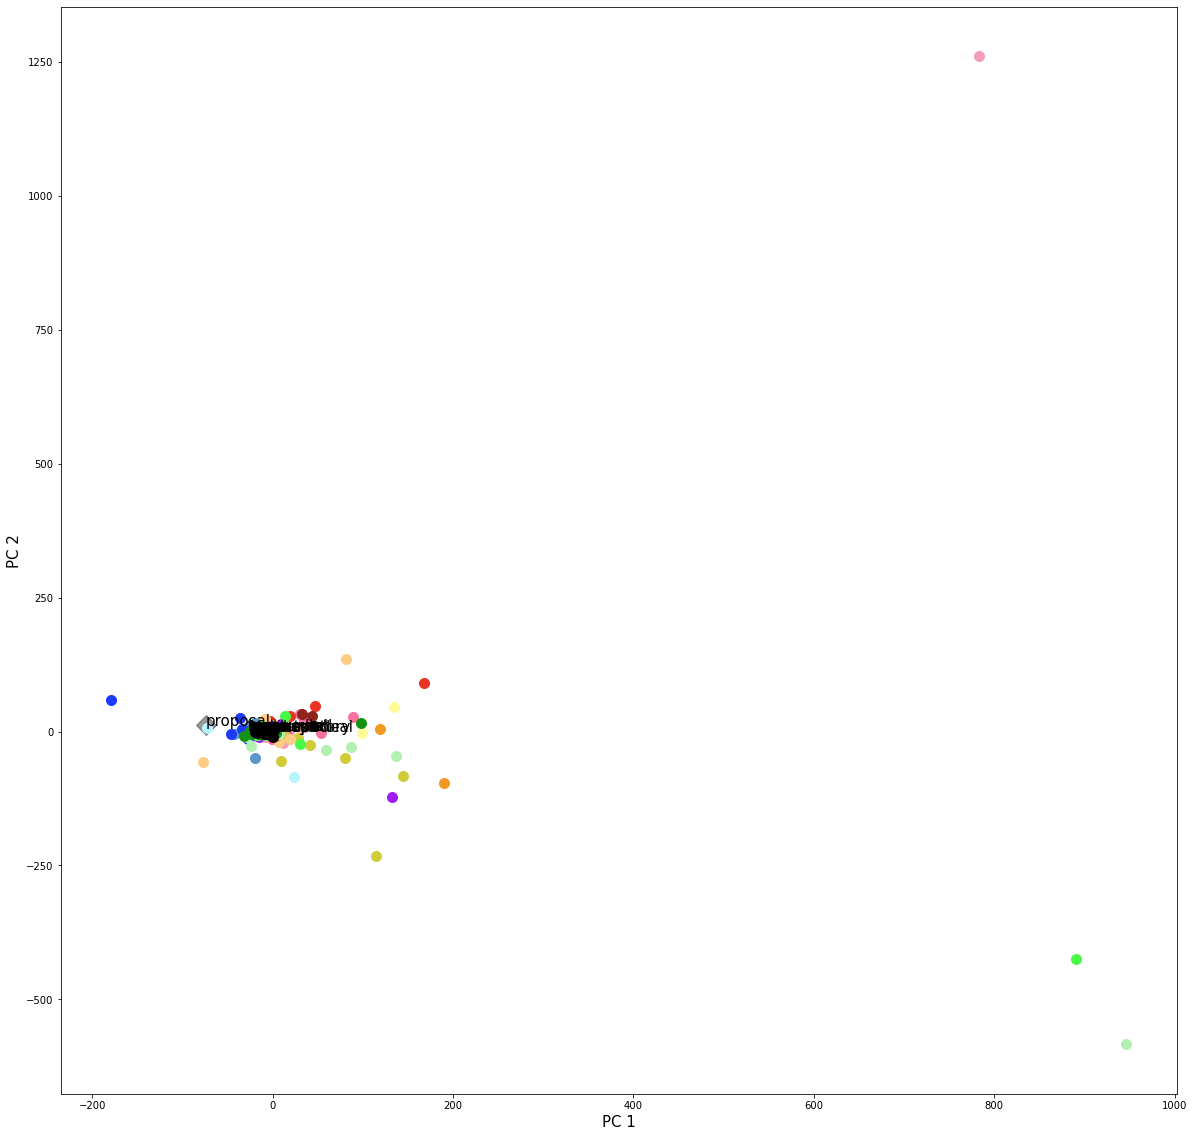

In [19]:
# the labeling is not correct
## plot
plt.figure(figsize=(20,20))


#normalize all_wv
norm_new_wv = norm_300(new_wv)

## PCA for first 2 PCs
pca = PCA(n_components=2)
pca.fit(new_wv)
pc12 = pca.transform(norm_new_wv)

###### Plot the templates

# Order keys list
order_keys_list = ['restaurant', 'breakup', 'airport', 'proposal', 'grocery story', 'business deal', 'lecture hall', 'meet-cute']

plt.scatter(pc12[0:8,0], pc12[0:8,1],c= 'k', marker = 'D', s = 200, alpha = .4)

for i in range(8):
    plt.text(pc12[i, 0] + .0035, pc12[i, 1], s= order_keys_list[i], fontsize=15 )
    
plt.xlabel("PC 1", fontsize=15); plt.ylabel("PC 2",fontsize=15);

#### Plot the story word vectors
keys = [11, 12, 13, 14, 21, 22, 23, 24, 31, 32, 33, 34, 41, 42, 43, 44]
colors = ['#F49CBB', '#F671A0',  '#EB3223', '#8E251C', '#FFFC97', '#D0CC38', '#FFCB85', '#F19923', '#B6F7FE', '#5896CD', '#1C3AF8', '#9E1CF8', '#B1F0B0', '#48FA45', '#129210', '#000000']
count = 0

#story 11
for i in range(0, 16):
    plt.scatter(pc12[ranges[i]:ranges[i+1],0], pc12[ranges[i]:ranges[i+1],1],c= colors[i], marker = 'o', s = 100, alpha = 1)
    print(colors[i])
#how do I plot??
#plt.legend(colors, keys)

print('light pink is restaurant break up')
print('dark pink is airport break up')
print('red is grocery store break up')
print('maroon is lecture hall break up')
print('light yellow is restaurant proposal')
print('dark yellow is airport proposal')
print('light orange is grocery store proposal')
print('dark orange is lecture hall proposal')
print('light blue is restaurant business deal')
print('medium blue is airport business deal')
print('dark blue is grocery store business deal')
print('dark purple is lecture hall business deal')
print('light green is restaurant meet-cute')
print('bright green is airport meet-cute')
print('forest green is grocery store meet-cute')
print('black is lecture hall meet-cute')

## E. Avg participants within each story and plot

In [20]:
first = 0


for key in keys:
    for i in range(0, 3):
        if i == 0:
            this_matrix = recalls[key][i]
        else:
            this_matrix = np.concatenate((this_matrix, recalls[key][i]), axis =0)
    avg_vec = np.mean(this_matrix, axis = 0)
    avg_vec = avg_vec.reshape(-1, 1)
    avg_vec = avg_vec.T
    if first == 0:
        avg_matrix = avg_vec
        first = 1
    else:
        avg_matrix = np.concatenate((avg_matrix, avg_vec), axis = 0)

In [21]:
avg_all_wv = np.concatenate((wvs_matrix, avg_matrix), axis = 0)

TypeError: alpha must be a float or None

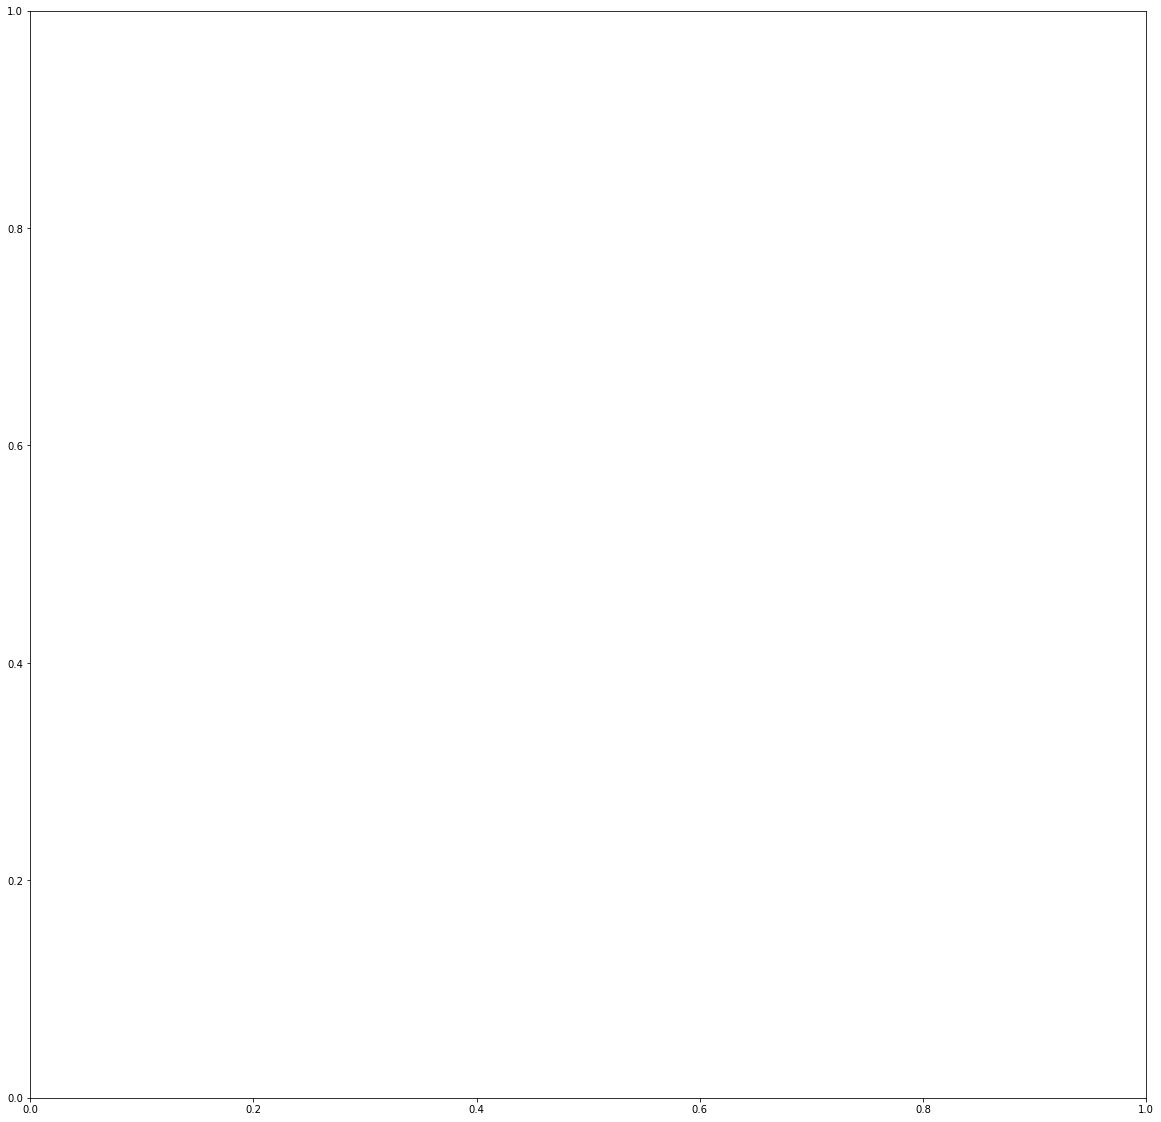

In [22]:
## plot
plt.figure(figsize=(20,20))

#norm
avg_all_wv = norm_300(avg_all_wv)

## PCA for first 2 PCs
pca = PCA(n_components=2)
pca.fit(avg_all_wv)
pc12 = pca.transform(avg_all_wv)

###### Plot the templates

# Order keys list
order_keys_list = ['restaurant', 'breakup', 'airport', 'proposal', 'grocery story', 'business deal', 'lecture hall', 'meet-cute']

plt.scatter(pc12[0:8,0], pc12[0:8,1],c= 'k', marker = 'D', s = 200, alpha = '.4')

for i in range(8):
    plt.text(pc12[i, 0] + .0035, pc12[i, 1], s= order_keys_list[i], fontsize=15 )
    
plt.xlabel("PC 1", fontsize=15); plt.ylabel("PC 2",fontsize=15);

#### Plot the story word vectors
keys = [11, 12, 13, 14, 21, 22, 23, 24, 31, 32, 33, 34, 41, 42, 43, 44]
colors = ['#F49CBB', '#F671A0',  '#EB3223', '#8E251C', '#FFFC97', '#D0CC38', '#FFCB85', '#F19923', '#B6F7FE', '#5896CD', '#1C3AF8', '#9E1CF8', '#B1F0B0', '#48FA45', '#129210', '#000000']
count = 0

#story 11
for i in range(0, 16):
    plt.scatter(pc12[i+8,0], pc12[i+8,1],c= colors[i], marker = 'o', s = 100, alpha = 1)

#how do I plot??
#plt.legend(colors, keys)

print('light pink is restaurant break up')
print('dark pink is airport break up')
print('red is grocery store break up')
print('maroon is lecture hall break up')
print('light yellow is restaurant proposal')
print('dark yellow is airport proposal')
print('light orange is grocery store proposal')
print('dark orange is lecture hall proposal')
print('light blue is restaurant business deal')
print('medium blue is airport business deal')
print('dark blue is grocery store business deal')
print('dark purple is lecture hall business deal')
print('light green is restaurant meet-cute')
print('bright green is airport meet-cute')
print('forest green is grocery store meet-cute')
print('black is lecture hall meet-cute')

# II. Plot all recalls for each story- comparison to stories
## A. Concatenatate story vectors

In [23]:
# Concatenating wvs for plotting below
wv_dim = 300
stories_concat = np.zeros((16, wv_dim))
order_keys = np.zeros((16,1))
count = 0
for key in stories:
    print(key)
    stories_concat[count, :] = stories[key]
    order_keys[count] = key
    count += 1

11
12
13
14
21
22
23
24
31
32
33
34
41
42
43
44


In [24]:
## B. Concat recalls

In [25]:
concat_stories = {}

first = 0

keys = [11, 12, 13, 14, 21, 22, 23, 24, 31, 32, 33, 34, 41, 42, 43, 44]
ranges = [16]



for key in keys:
    for i in range(0, 3):
        if first == 0:
            cc_recalls = recalls[key][i]
            first = 1
        else:
            cc_recalls = np.concatenate((cc_recalls, recalls[key][i]), axis =0)
    ranges.append((ranges[-1] + sums[key][0]))

## C. Concatenate stories and recalls

In [26]:
concat_stories_recalls = np.concatenate((stories_concat, cc_recalls), axis = 0)

## D. Plot

TypeError: alpha must be a float or None

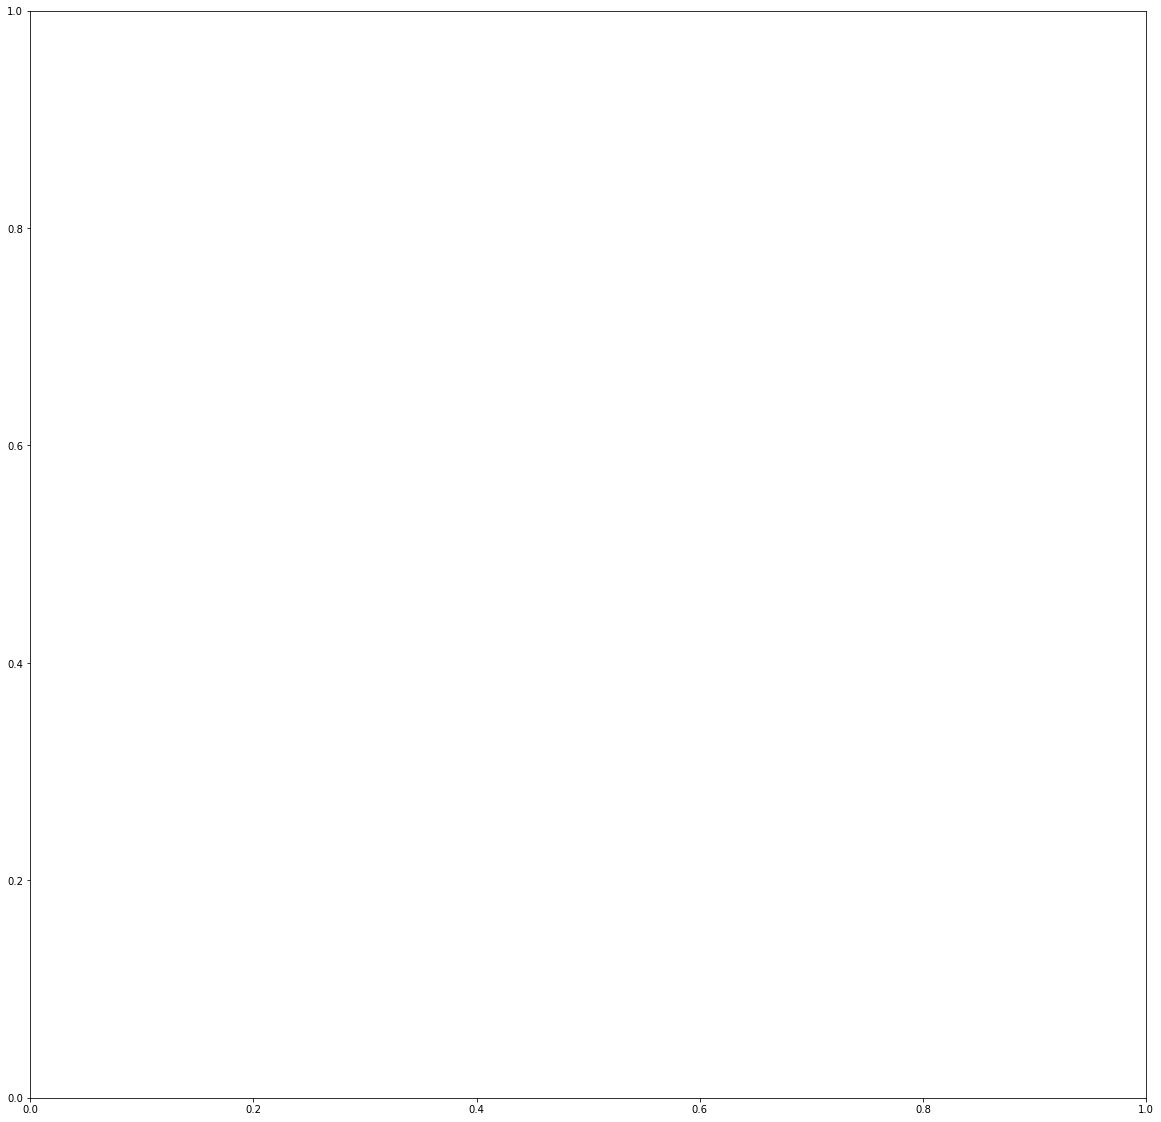

In [27]:
## plot
plt.figure(figsize=(20,20))

#normalize
concat_stories_recalls = norm_300(concat_stories_recalls)

## PCA for first 2 PCs
pca = PCA(n_components=2)
pca.fit(concat_stories_recalls)
pc12 = pca.transform(concat_stories_recalls)

###### Plot the templates

# Order keys list
order_keys_list = ['11', '12', '13', '14', '21', '22', '23', '24', '31', '32', '33', '34', '41', '42', '43', '44']

plt.scatter(pc12[0:16,0], pc12[0:16,1],c= 'k', marker = 'D', s = 200, alpha = '.4')

for i in range(16):
    plt.text(pc12[i, 0] + .0035, pc12[i, 1], s= order_keys_list[i], fontsize=15 )
    
plt.xlabel("PC 1", fontsize=15); plt.ylabel("PC 2",fontsize=15);

#### Plot the story word vectors
keys = [11, 12, 13, 14, 21, 22, 23, 24, 31, 32, 33, 34, 41, 42, 43, 44]
colors = ['#F49CBB', '#F671A0',  '#EB3223', '#8E251C', '#FFFC97', '#D0CC38', '#FFCB85', '#F19923', '#B6F7FE', '#5896CD', '#1C3AF8', '#9E1CF8', '#B1F0B0', '#48FA45', '#129210', '#000000']
count = 0

plt.xlim(-500,500)
plt.ylim(-500,500)

#story 11
for i in range(0, 16):
    plt.scatter(pc12[ranges[i]:ranges[i+1],0], pc12[ranges[i]:ranges[i+1],1],c= colors[i], marker = 'o', s = 100, alpha = 1)
    print(colors[i])
#how do I plot??
#plt.legend(colors, keys)

print('light pink is restaurant break up')
print('dark pink is airport break up')
print('red is grocery store break up')
print('maroon is lecture hall break up')
print('light yellow is restaurant proposal')
print('dark yellow is airport proposal')
print('light orange is grocery store proposal')
print('dark orange is lecture hall proposal')
print('light blue is restaurant business deal')
print('medium blue is airport business deal')
print('dark blue is grocery store business deal')
print('dark purple is lecture hall business deal')
print('light green is restaurant meet-cute')
print('bright green is airport meet-cute')
print('forest green is grocery store meet-cute')
print('black is lecture hall meet-cute')

## E. Avg participants within each story and plot

In [20]:
first = 0


for key in keys:
    for i in range(0, 3):
        if i == 0:
            avg_recalls = recalls[key][i]
        else:
            avg_recalls = np.concatenate((avg_recalls, recalls[key][i]), axis =0)
    avg_vec = np.mean(avg_recalls, axis = 0)
    avg_vec = avg_vec.reshape(-1, 1)
    avg_vec = avg_vec.T
    if first == 0:
        avg_matrix = avg_vec
        first = 1
    else:
        avg_matrix = np.concatenate((avg_matrix, avg_vec), axis = 0)

In [21]:
avg_all_wv = np.concatenate((stories_concat, avg_matrix), axis = 0)

light pink is 11:restaurant break up
dark pink is 12: airport break up
red is 13: grocery store break up
maroon is 14:lecture hall break up
light yellow is 21: restaurant proposal
dark yellow is 22: airport proposal
light orange is 23:grocery store proposal
dark orange is 24: lecture hall proposal
light blue is 31: restaurant business deal
medium blue is 32: airport business deal
dark blue is 33: grocery store business deal
dark purple is 34: lecture hall business deal
light green is 41: restaurant meet-cute
bright green is 42: airport meet-cute
forest green is 43: grocery store meet-cute
black is 44: lecture hall meet-cute


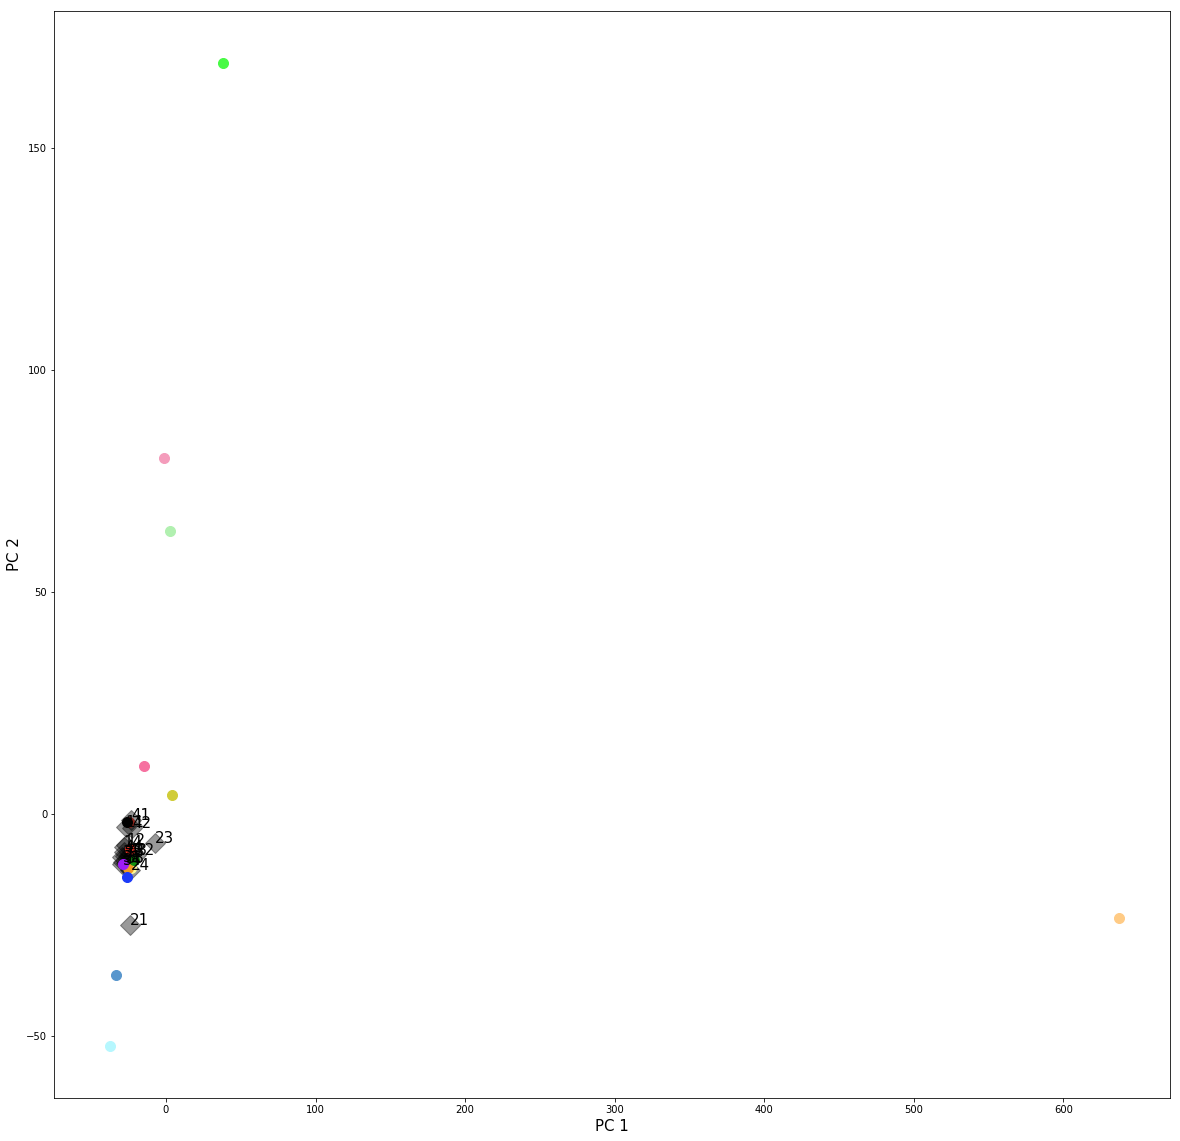

In [22]:
## plot
plt.figure(figsize=(20,20))

#normalize
avg_all_wv = norm_300(avg_all_wv)

## PCA for first 2 PCs
pca = PCA(n_components=2)
pca.fit(avg_all_wv)
pc12 = pca.transform(avg_all_wv)

###### Plot the templates

# Order keys list
order_keys_list = ['11', '12', '13', '14', '21', '22', '23', '24', '31', '32', '33', '34', '41', '42', '43', '44']

plt.scatter(pc12[0:16,0], pc12[0:16,1],c= 'k', marker = 'D', s = 200, alpha = '.4')

for i in range(16):
    plt.text(pc12[i, 0] + .0035, pc12[i, 1], s= order_keys_list[i], fontsize=15 )
    
plt.xlabel("PC 1", fontsize=15); plt.ylabel("PC 2",fontsize=15);

#### Plot the story word vectors
keys = [11, 12, 13, 14, 21, 22, 23, 24, 31, 32, 33, 34, 41, 42, 43, 44]
colors = ['#F49CBB', '#F671A0',  '#EB3223', '#8E251C', '#FFFC97', '#D0CC38', '#FFCB85', '#F19923', '#B6F7FE', '#5896CD', '#1C3AF8', '#9E1CF8', '#B1F0B0', '#48FA45', '#129210', '#000000']
count = 0

#story 11
for i in range(0, 16):
    plt.scatter(pc12[i+16,0], pc12[i+16,1],c= colors[i], marker = 'o', s = 100, alpha = 1)

#how do I plot??
#plt.legend(colors, keys)

print('light pink is 11:restaurant break up')
print('dark pink is 12: airport break up')
print('red is 13: grocery store break up')
print('maroon is 14:lecture hall break up')
print('light yellow is 21: restaurant proposal')
print('dark yellow is 22: airport proposal')
print('light orange is 23:grocery store proposal')
print('dark orange is 24: lecture hall proposal')
print('light blue is 31: restaurant business deal')
print('medium blue is 32: airport business deal')
print('dark blue is 33: grocery store business deal')
print('dark purple is 34: lecture hall business deal')
print('light green is 41: restaurant meet-cute')
print('bright green is 42: airport meet-cute')
print('forest green is 43: grocery store meet-cute')
print('black is 44: lecture hall meet-cute')